In [7]:
%pip install pandas matplotlib

     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
      --------------------------------------- 0.1/8.1 MB 3.6 MB/s eta 0:00:03
     - -------------------------------------- 0.3/8.1 MB 3.4 MB/s eta 0:00:03
     -- ------------------------------------- 0.4/8.1 MB 2.9 MB/s eta 0:00:03
     -- ------------------------------------- 0.6/8.1 MB 3.0 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/8.1 MB 3.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/8.1 MB 2.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/8.1 MB 3.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/8.1 MB 2.9 MB/s eta 0:00:03
     ------ --------------------------------- 1.3/8.1 MB 3.0 MB/s eta 0:00:03
     ------- -------------------------------- 1.4/8.1 MB 2.9 MB/s eta 0:00:03
     ------- -------------------------------- 1.5/8.1 MB 3.0 MB/s eta 0:00:03
     -------- ------------------------------- 1.7/8.1 MB 3.0 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
%pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ------------------ ------------------- 143.4/294.9 kB 2.9 MB/s eta 0:00:01
     ------------------------------------ - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [12]:
df = pd.read_csv("AIML Dataset.csv")

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [19]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [21]:
df.isnull().sum().sum()

0

In [24]:
df.shape[0]

6362620

In [27]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2) 

0.13

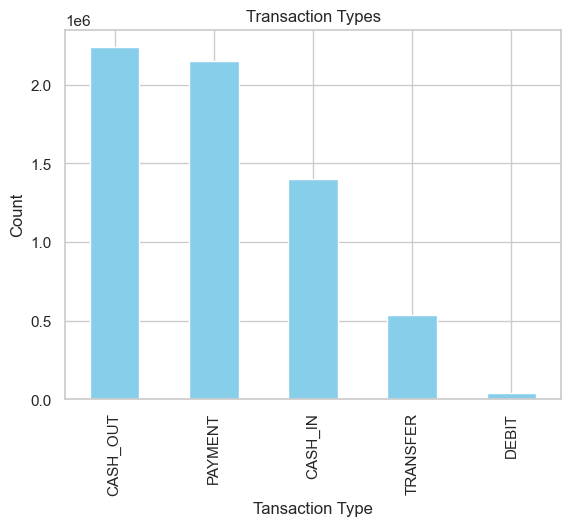

In [29]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="skyblue")
plt.xlabel("Tansaction Type")
plt.ylabel("Count")
plt.show()

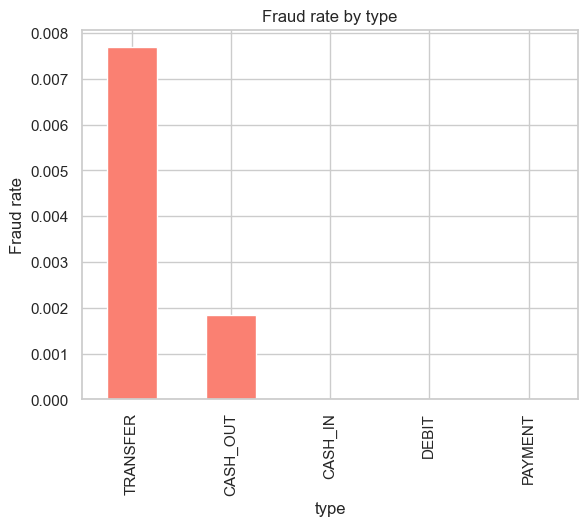

In [30]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title = "Fraud rate by type", color="salmon")
plt.ylabel("Fraud rate")
plt.show()

In [32]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

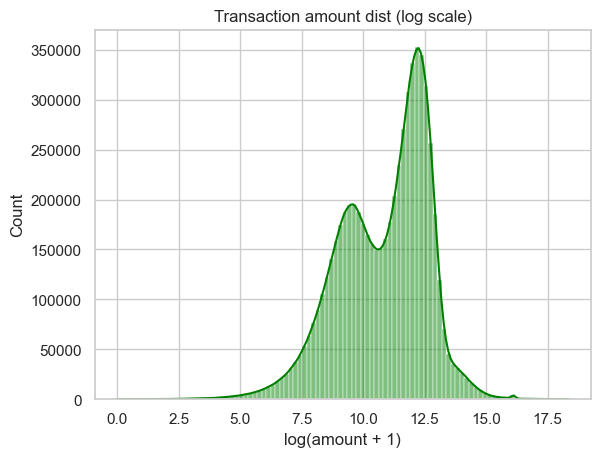

In [33]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde = True, color ="green")
plt.title("Transaction amount dist (log scale)")
plt.xlabel("log(amount + 1)")
plt.show()

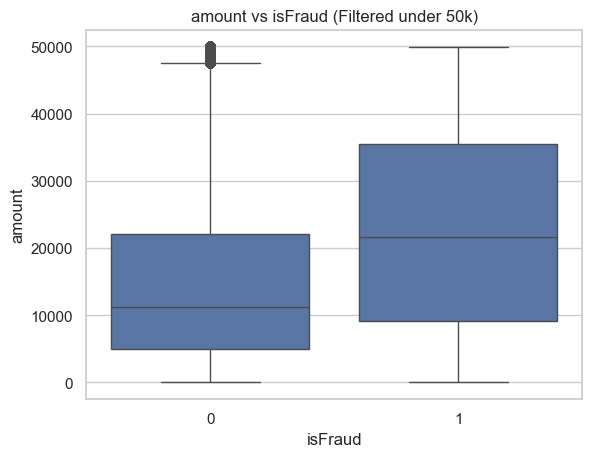

In [34]:
sns.boxplot(data=df[df["amount"] < 50000], x = "isFraud", y = "amount")
plt.title("amount vs isFraud (Filtered under 50k)")
plt.show()

In [35]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [37]:
(df["balanceDiffOrig"] < 0).sum()

1399253

In [38]:
(df["balanceDiffDest"] < 0).sum()

1238864

In [40]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


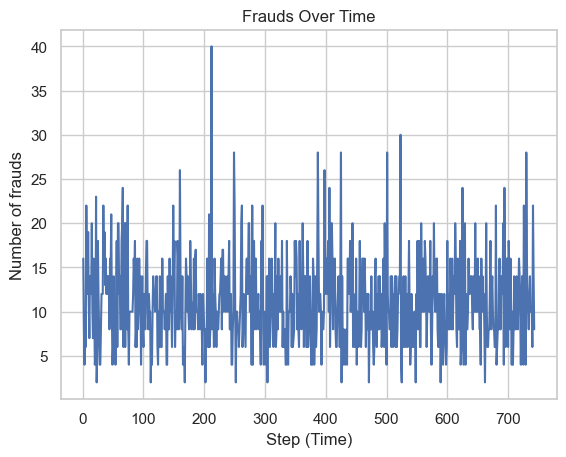

In [42]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label="Fraud per step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [43]:
df.drop(columns="step", inplace=True)

In [44]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [45]:
top_senders = df["nameOrig"].value_counts().head(10)

In [46]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [47]:
top_receivers = df["nameDest"].value_counts().head(10)

In [48]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [49]:
fraud_users = df[df["isFraud"] ==1]["nameOrig"].value_counts().head(10)

In [50]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [51]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [54]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

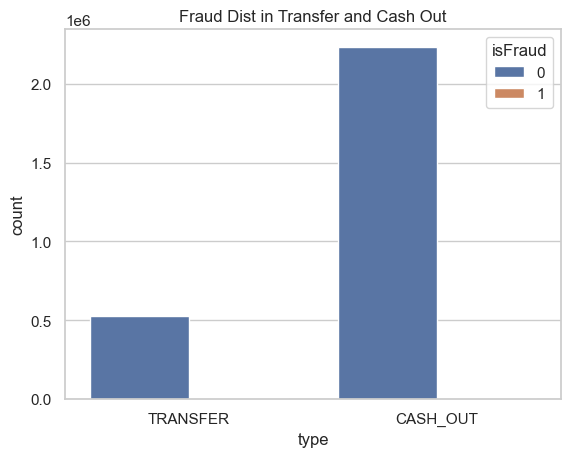

In [55]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Dist in Transfer and Cash Out")
plt.show()

In [56]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

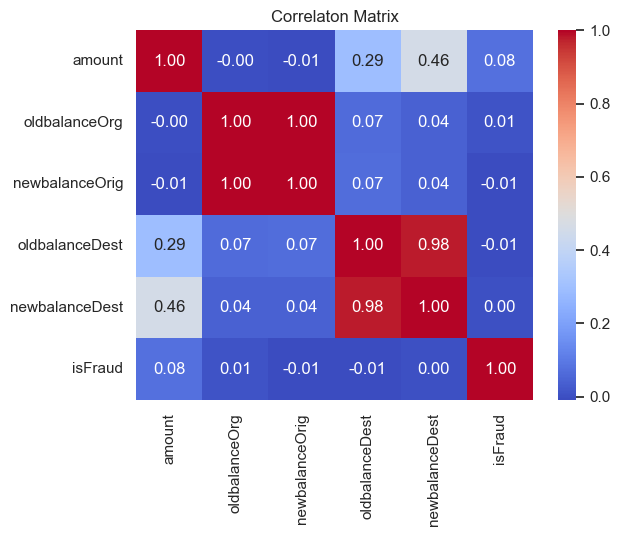

In [57]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaton Matrix")
plt.show()

In [58]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [59]:
len(zero_after_transfer)

1188074

In [60]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [61]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [63]:
%pip install scikit.learn

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------------- 0.0/10.7 MB 960.0 kB/s eta 0:00:12
     --------------------------------------- 0.0/10.7 MB 960.0 kB/s eta 0:00:12
     --------------------------------------- 0.1/10.7 MB 737.3 kB/s eta 0:00:15
     --------------------------------------- 0.1/10.7 MB 737.3 kB/s eta 0:00:15
     --------------------------------------- 0.1/10.7 MB 737.3 kB/s eta 0:00:15
      -------------------------------------- 0.2/10.7 MB 615.9 kB/s eta 0:00:18
      -------------------------------------- 0.2/10.7 MB 615.9 kB/s eta 0:00:18
      -------------------------------------- 0.2/10.7 MB 625.8 kB/s eta 0:00:17
     - ------------------------------------- 0.3/10.7 MB 737.3 kB/s eta 0:00:15
     - ------------------------------------- 0.3/10.7 MB 737.3 kB/s eta 0:00:15
     - ------------------------------------- 0.3/10.7 MB 675.6 kB/s eta 0:00:16
     - ------------------------------------- 0.3


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [65]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [66]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)

In [67]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [68]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg","newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [69]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis =1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

In [71]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder = "drop"
)

In [72]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [73]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
y_pred = pipeline.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [79]:
confusion_matrix(y_test, y_pred)

array([[1802946,  103376],
       [    151,    2313]], dtype=int64)

In [81]:
pipeline.score(X_test, y_test) * 100

94.57629089903216

In [82]:
import joblib

joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']